<a href="https://colab.research.google.com/github/VMI1997/UCB-Module-17/blob/main/Pract_App_Linderman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Per the provided documentation:
The dataset collected is related to 17 campaigns that
occurred between May 2008 and November 2010,
corresponding to a total of 79354 contacts

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [5]:
#First remove unknowns
df = df[df['job'] != 'unknown']
df.drop('default', axis=1, inplace=True)
df = df[df['housing'] != 'unknown']
df = df[df['loan'] != 'unknown']
df = df[df['education'] != 'unknown']
df = df[df['marital'] != 'unknown']

#Address non-numerics with one-hot encoding where applicable
df = pd.get_dummies(df, columns=['job'], dtype='int')
df = pd.get_dummies(df, columns=['education'], dtype='int')
df = pd.get_dummies(df, columns=['marital'], dtype='int')
df = pd.get_dummies(df, columns=['housing'], dtype='int')
df = pd.get_dummies(df, columns=['loan'], dtype='int')
df = pd.get_dummies(df, columns=['contact'], dtype='int')
df = pd.get_dummies(df, columns=['month'], dtype='int')
df = pd.get_dummies(df, columns=['day_of_week'], dtype='int')
df = pd.get_dummies(df, columns=['poutcome'], dtype='int')

df['y'] = df['y'].map({'yes': 1, 'no': 0})


df.info()

<ipython-input-5-ab704ec30234>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('default', axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 38245 entries, 0 to 41187
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38245 non-null  int64  
 1   duration                       38245 non-null  int64  
 2   campaign                       38245 non-null  int64  
 3   pdays                          38245 non-null  int64  
 4   previous                       38245 non-null  int64  
 5   emp.var.rate                   38245 non-null  float64
 6   cons.price.idx                 38245 non-null  float64
 7   cons.conf.idx                  38245 non-null  float64
 8   euribor3m                      38245 non-null  float64
 9   nr.employed                    38245 non-null  float64
 10  y                              38245 non-null  int64  
 11  job_admin.                     38245 non-null  int64  
 12  job_blue-collar                38245 non-null  int6

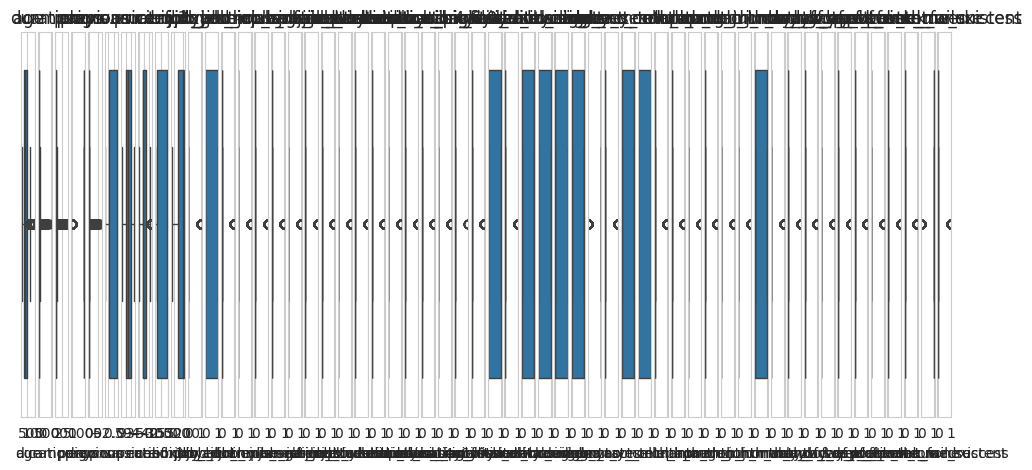

In [8]:
#Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
# Create subplots for each feature
fig, axes = plt.subplots(nrows=1, ncols=len(df.columns), figsize=(12, 5))

# Iterate through each feature and create a box plot
for i, col in enumerate(df.columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

plt.show()

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [9]:
from sklearn.model_selection import train_test_split
X = df.drop('y', axis=1)
y = df['y']
# Assuming you have your features in X and target variable in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [10]:
# Assume same guess of YES for each instance - model performance is simply the total "yes" values divided by total of "yes and no"
# This should be similar to the "constant" DummyClassifier
count_yes = df['y'].value_counts().get(1,0)
count_no = df['y'].value_counts().get(0,0)
count_total = count_yes + count_no
base_perf = (count_yes) / count_total
print(base_perf)
print(count_total)

0.11133481500849784
38245


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
strategies = ['most_frequent', 'stratified', 'uniform', 'constant','prior']

test_scores = []
for s in strategies:
    if s =='constant':
        dclf = DummyClassifier(strategy = s, random_state = 0, constant = 1)
    else:
        dclf = DummyClassifier(strategy = s, random_state = 0)
    dclf.fit(X_train, y_train)
    score = dclf.score(X_test, y_test)
    test_scores.append(score)

print(test_scores)

[0.8879592103542947, 0.8058569747679435, 0.49300562164988887, 0.11204078964570532, 0.8879592103542947]


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
lr_model = LogisticRegression()
#Start timer to capture training time
start_time = time.time()
lr_model.fit(X_train, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
lr_training_time = end_time - start_time
#Make predictions on test data and measure model accuracy
lr_test_pred = lr_model.predict(X_test)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
print("The test accuracy is: " + str(lr_test_acc))
#Make predictions on train data and measure model accuracy
lr_train_pred = lr_model.predict(X_train)
lr_train_acc = accuracy_score(y_train, lr_train_pred)
print("The train accuracy is: " + str(lr_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(lr_training_time) + " seconds.")

The test accuracy is: 0.9097921296901555
The train accuracy is: 0.909530657602301
The training time is: 0.9600486755371094 seconds.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Problem 9: Score the Model

What is the accuracy of your model?

Scoring the Model and Accuracy: The basic logistic regression model performed better than all of our baseline models - comparison below:

Best baseline: 88.8% with "most frequent"
Basic Logistic Regression: 90.98%

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [13]:
#Decsion Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
#Start timer to capture training time
start_time = time.time()
dtc.fit(X_train, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
dtc_training_time = end_time - start_time
dtc_test_pred = dtc.predict(X_test)
dtc_test_acc = accuracy_score(y_test, dtc_test_pred)
print("The test accuracy is: " + str(dtc_test_acc))
#Make predictions on train data and measure model accuracy
dtc_train_pred = dtc.predict(X_train)
dtc_train_acc = accuracy_score(y_train, dtc_train_pred)
print("The train accuracy is: " + str(dtc_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(dtc_training_time) + " seconds.")

The test accuracy is: 0.8921427637599686
The train accuracy is: 1.0
The training time is: 0.27515363693237305 seconds.


In [14]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
#Start timer to capture training time
start_time = time.time()
knn.fit(X_train, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
knn_training_time = end_time - start_time
#Make predictions on test data and measure model accuracy
knn_test_pred = knn.predict(X_test)
knn_test_acc = accuracy_score(y_test, knn_test_pred)
print("The test accuracy is: " + str(knn_test_acc))
#Make predictions on train data and measure model accuracy
knn_train_pred = knn.predict(X_train)
knn_train_acc = accuracy_score(y_train, knn_train_pred)
print("The train accuracy is: " + str(knn_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(knn_training_time) + " seconds.")

The test accuracy is: 0.9078310890312459
The train accuracy is: 0.9310040528173618
The training time is: 0.01612257957458496 seconds.


In [15]:
#SVM
from sklearn.svm import SVC
svm = SVC()
#Start timer to capture training time
start_time = time.time()
svm.fit(X_train, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
svm_training_time = end_time - start_time
svm_test_pred = svm.predict(X_test)
svm_test_acc = accuracy_score(y_test, svm_test_pred)
print("The test accuracy is: " + str(svm_test_acc))
#Make predictions on train data and measure model accuracy
svm_train_pred = svm.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
print("The train accuracy is: " + str(svm_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(svm_training_time) + " seconds.")

The test accuracy is: 0.8964570532095699
The train accuracy is: 0.8987776179892797
The training time is: 17.016422271728516 seconds.


In [16]:
perf_results = {
    'model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'train_time': [lr_training_time, knn_training_time, dtc_training_time, svm_training_time],
    'train_accuracy': [lr_train_acc, knn_train_acc, dtc_train_acc, svm_train_acc],
    'test_accuracy': [lr_test_acc, knn_test_acc, dtc_test_acc, svm_test_acc]
}
perf_df = pd.DataFrame(perf_results)
perf_df

,model,train_time,train_accuracy,test_accuracy
0,Logistic Regression,0.960049,0.909531,0.909792
1,KNN,0.016123,0.931004,0.907831
2,Decision Tree,0.275154,1.000000,0.892143
3,SVM,17.016422,0.898778,0.896457


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [17]:
#Scaling prior to Logistic Regression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model_scaled = LogisticRegression()
#Start timer to capture training time
start_time = time.time()
lr_model_scaled.fit(X_train_scaled, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
lr_training_time = end_time - start_time
#Make predictions on test data and measure model accuracy
lr_test_pred = lr_model.predict(X_test_scaled)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
print("The test accuracy is: " + str(lr_test_acc))
#Make predictions on train data and measure model accuracy
lr_train_pred = lr_model_scaled.predict(X_train_scaled)
lr_train_acc = accuracy_score(y_train, lr_train_pred)
print("The train accuracy is: " + str(lr_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(lr_training_time) + " seconds.")


The test accuracy is: 0.7068897895149693
The train accuracy is: 0.9123087985357563
The training time is: 0.21525359153747559 seconds.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


OBSERVATION: applying scaling to the data worsens the results.

In [18]:
#Improve on Logistic Regression through use of L1 Regularization
from sklearn.model_selection import GridSearchCV
lr_model_lasso = LogisticRegression(penalty='l1', solver='liblinear', C=1.0, random_state=42)
start_time = time.time()
lr_model_lasso.fit(X_train, y_train)
end_time = time.time()
total_train_time = end_time - start_time
y_pred = lr_model_lasso.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("The training time is: " + str(lr_training_time) + "seconds")

Accuracy: 0.9109687540855014
The training time is: 0.21525359153747559seconds


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


OBSERVATION: Using L1 regularization improved on our accuracy from the initial LR model which achieved 90.98%. Additionally, it only slightly increase the training time of the model.

In [ ]:
#Explore max depth of decision tree
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=4)
#Start timer to capture training time
start_time = time.time()
dtc.fit(X_train, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
dtc_training_time = end_time - start_time
dtc_test_pred = dtc.predict(X_test)
dtc_test_acc = accuracy_score(y_test, dtc_test_pred)
print("The test accuracy is: " + str(dtc_test_acc))
#Make predictions on train data and measure model accuracy
dtc_train_pred = dtc.predict(X_train)
dtc_train_acc = accuracy_score(y_train, dtc_train_pred)
print("The train accuracy is: " + str(dtc_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(dtc_training_time) + " seconds.")

OBSERVATION: Setting max depth = 4 provides the optimal accuracy and is an improvement on the 89.38% from previous model without depth specified. Additionally, it improved the training time as a result of limiting depth.

In [ ]:
#Evaluate dropping additional features - in this case, drop duration.
df_no_duration = df.drop('duration', axis=1)
X = df_no_duration.drop('y', axis=1)
y = df_no_duration['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Rerun Logistic Regression model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time
lr_model = LogisticRegression()
#Start timer to capture training time
start_time = time.time()
lr_model.fit(X_train, y_train)
#End timer to capture training time
end_time = time.time()
#Calculate the total training time
lr_training_time = end_time - start_time
#Make predictions on test data and measure model accuracy
lr_test_pred = lr_model.predict(X_test)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
print("The test accuracy is: " + str(lr_test_acc))
#Make predictions on train data and measure model accuracy
lr_train_pred = lr_model.predict(X_train)
lr_train_acc = accuracy_score(y_train, lr_train_pred)
print("The train accuracy is: " + str(lr_train_acc))
#Report on total training time for basic LR model
print("The training time is: " + str(lr_training_time) + " seconds.")


##### Questions